In [144]:
import numpy as np
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

In [4]:
os.getcwd()

'C:\\Users\\n485800\\Documents\\pythonR\\RStudio\\costsjl'

In [301]:
file_ttjl = 'financettjl_data_20190321.xlsx'
file_jl = 'finanacejl_data2_20190321_without_delete.xlsx'
ttjl = pd.read_excel(file_ttjl, index_col='Datum')
jl = pd.read_excel(file_jl, index_col='Datum')
jl.columns = jl.columns.str.lower()
ttjl.columns = ttjl.columns.str.lower()

In [302]:
jl.rename(columns={'category': 'category1', 'category.2': 'category2'}, inplace=True)

In [303]:
jl['source'] = 'jl'
ttjl['source'] = 'ttjl'

In [304]:
# create col spend. I only pay for half of ttjl expenses.
jl['spend'] = jl['belopp']
ttjl['spend'] = ttjl['belopp'] / 2

In [305]:
# remove ttjl because it is double counting
jl2 = jl.loc[jl.category1 != 'ttjl']

In [306]:
df = pd.concat([jl2, ttjl], axis=0)
df.drop(['saldo', 'kategori'], axis=1, inplace=True)
df.columns = df.columns.str.replace('category', 'cat').str.replace('belopp', 'amount').str.replace('transaktion', 'text')

In [307]:
df = df.loc[df.cat1 != 'delete']

In [213]:
df.loc['2019-02'].groupby(['cat1'])['amount', 'jl', 'ttjl'].sum().sort_values('amount')

,amount,jl,ttjl
cat1,,,
boende,-4972.00,1.0,2.0
mat,-4249.52,3.0,17.0
handla,-3184.59,0.0,11.0
alkohol,-3141.80,6.0,5.0
kläder,-630.00,3.0,0.0
övrigt,-616.00,2.0,0.0
givewell,-539.05,1.0,0.0
viaplay,-399.00,1.0,0.0
försäkring,-361.00,1.0,0.0


# help variables

In [318]:
NR_TX = df.shape[0]

In [319]:
DAYS = df.index.max() - df.index.min()
DAYS = DAYS / np.timedelta64(1, 'D')
MONTHS = DAYS / 30
YEARS = DAYS / 360

In [320]:
AMOUNT_TOT = df.loc[df.amount < 0, 'amount'].sum()
AMOUNT_TOT / MONTHS

-31691.434213685476

In [321]:
df['jl'] = df.source == 'jl'
df['ttjl'] = df.source == 'ttjl'

In [322]:
df['year'] = df.index.year
df['month'] = df.index.month

In [360]:
cols1 = ['cat1', 'spend', 'jl', 'text', 'year', 'month']

# look at one month

to see if it is correctly merged

In [324]:
df.loc['2019-01'].groupby(['cat1'])['spend', 'jl', 'ttjl'].sum().sort_values('spend')

,spend,jl,ttjl
cat1,,,
resa,-6891.435,0.0,5.0
boende,-3217.000,1.0,4.0
alkohol,-2982.900,9.0,3.0
sl,-1992.000,2.0,0.0
mat,-1394.620,1.0,15.0
qq,-1217.000,5.0,0.0
teknik,-1169.360,3.0,0.0
kul,-1166.000,10.0,2.0
övrigt,-982.000,2.0,2.0


# tables

In [ ]:
## count per category 

In [170]:
df.cat1.value_counts().head(10)

mat        401
resa       305
handla     273
boende     143
kul        138
alkohol    128
kläder      81
ttjl        81
övrigt      81
uber        78
Name: cat1, dtype: int64

In [ ]:
## amount by category. sum and %

In [387]:
df.loc[df.spend > 0, cols1].sort_values('spend')

,cat1,spend,jl,text,year,month
Datum,,,,,,
2018-02-19,kul,3.000,False,Återköp 180101 Lets Deal,2018,2
2017-10-17,uber,17.500,False,Återköp 171015 UBER TRIP YRDCV HELP,2017,10
2018-06-11,kläder,20.000,True,"Birken THÖRN,THERESE",2018,6
2017-09-18,teknik,31.170,True,Återköp 170915 STANDARD NOTES,2017,9
2017-03-28,uber,40.000,True,Swish inbetalning LINA NILSSON,2017,3
2018-09-15,teknik,46.000,True,workflowy,2018,9
2017-11-20,resa,46.500,False,MYTAXI TT 300683317,2017,11
2017-04-03,teknik,49.000,True,Återköp 170330 INET STHLM,2017,4
2017-10-20,övrigt,50.000,True,Swish inbetalning Lisa Ljung,2017,10


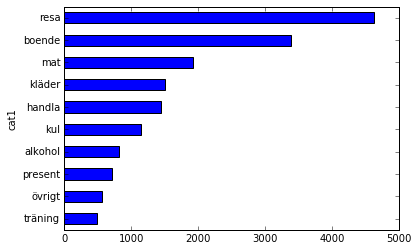

In [413]:
# by %
a = df.groupby('cat1').spend.sum().nsmallest(10).div(-MONTHS, 1)
a.sort_values().plot.barh() 

In [448]:
CAT1_TOP10 = a.index

In [419]:
# jl only, monthly cost.
df.loc[df.source == 'jl'].\
  groupby('cat1')['spend'].sum().nsmallest(10) / MONTHS

cat1
kläder     -1488.371309
boende     -1332.333133
mat        -1265.042737
resa       -1177.466507
kul         -960.015486
present     -685.834214
övrigt      -514.840696
alkohol     -491.558824
träning     -486.788715
givewell    -398.051020
Name: spend, dtype: float64

In [421]:
# df.groupby(['source', 'cat1']).amount.sum()#.nsmallest(10)

In [ ]:
# 

# explore

In [332]:
df.loc['2018':].groupby(['year', 'month']).spend.sum()/1000

year  month
2018  1        -9.003720
      2        -6.490160
      3        -4.086780
      4       -13.603245
      5       -10.740345
      6       -17.322190
      7       -19.334680
      8       -19.336980
      9        -7.340255
      10      -11.847730
      11      -25.268015
      12       -8.910630
2019  1       -13.790680
      2        -5.656955
      3       -10.101495
Name: spend, dtype: float64

In [ ]:
# search for sonos. was that handled as it should?

In [363]:
# expensive stuff
df.loc['2018-01':'2018-8'].query('spend < -1500')[cols1].head()

,cat1,spend,jl,text,year,month
Datum,,,,,,
2018-02-01,teknik,-6000.0,True,Swish betalning Moran Yaniv,2018,2
2018-02-05,kläder,-2997.0,True,Kortköp 180203 HERR JUDIT,2018,2
2018-03-28,qq,-1955.0,True,Betalning BG 852-7541 Zalando AG,2018,3
2018-05-07,mat,-1600.0,True,Punk royale kompisar 1104 20 92109,2018,5
2018-05-08,resa,-8030.0,True,flyg bilbao,2018,5


In [500]:
# avg spend per month
df.loc['2018'].spend.sum() / 12000

-22.18142500000002

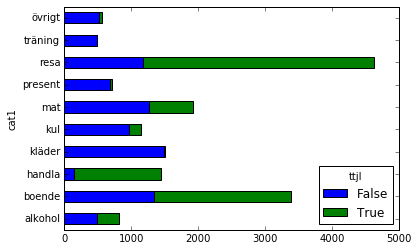

In [513]:
# plot monthly spend in top10 categories. color by source.
df[df.cat1.isin(CAT1_TOP10)].\
    groupby(['ttjl', 'cat1'])['spend'].\
      sum().unstack('ttjl').div(-MONTHS, 1).\
        plot(kind='barh', stacked=True)

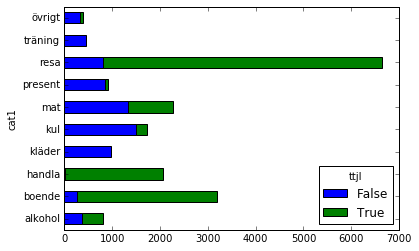

In [539]:
# same as above but look at a certain year. 2017 and 2018 is different!
df_year = df.loc['2018']
df_year[df_year.cat1.isin(CAT1_TOP10)].\
    groupby(['ttjl', 'cat1'])['spend'].\
      sum().unstack('ttjl').div(-12, 1).\
        plot(kind='barh', stacked=True)

In [495]:
# what "mat" was i buying? 
df['2017':].query('cat1 == "mat" & jl')['spend'].sum()/12

-2730.5016666666675

In [474]:
# no food after 2018 (hidden in black+gold card...)
df['2018':].query('cat1 == "mat" & jl').spend.sum()

0

In [538]:
# costs for boende that only i carry
df.loc['2018'].query('cat1 == "boende" & jl')  # almost all are hemf
df.loc[df.text.str.contains('SKADEF'), cols1]
# todo think about if this is as it should be. 

,cat1,spend,jl,text,year,month
Datum,,,,,,
2016-12-13,boende,-664.0,True,Betalning PG 822700-1 IF SKADEFÖRSÄKRI,2016,12
2017-06-01,boende,-216.0,True,Autogiro IF SKADEFÖRS,2017,6
2017-07-03,övrigt,-107.0,True,Autogiro IF SKADEFÖRS,2017,7
2017-08-01,present,-107.0,True,Autogiro IF SKADEFÖRS,2017,8
2017-09-01,boende,-107.0,True,Autogiro IF SKADEFÖRS,2017,9
2017-10-02,boende,-107.0,True,Autogiro IF SKADEFÖRS,2017,10
2017-11-01,boende,-123.0,True,Autogiro IF SKADEFÖRS,2017,11
2017-12-01,boende,-117.0,True,Autogiro IF SKADEFÖRS,2017,12
2018-01-02,boende,-117.0,True,Autogiro IF SKADEFÖRS,2018,1
